<a href="https://colab.research.google.com/github/SciMathist/Project-QKD/blob/main/Copy_of_Image_Encryption_with_AES_and_BB84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BB84 Protocol to prepare the shared private key

### Installing and importing the dependencies

In [ ]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
INFO: pip is looking at

In [ ]:
import cirq
import numpy as np

### Defining ClassicalBit class

In [ ]:
class ClassicalBit:
    def __init__(self, value=None):
        # Ensure the initial value is valid (0, 1, or None)
        if value not in [0, 1, None]:
            raise ValueError("Classical bit value must be 0, 1, or None.")
        self.value = value  # Initialize the value

    def set_value(self, value):
        """Set the value of the classical bit."""
        if value not in [0, 1]:
            raise ValueError("Classical bit value must be 0 or 1.")
        self.value = value

    def get_value(self):
        """Get the value of the classical bit."""
        return self.value

    @staticmethod
    def random():
        """Create a classical bit with a random value."""
        return ClassicalBit(np.random.randint(0, 2))

    @staticmethod
    def range(n):
        """Generate a list of n classical bits."""
        return [ClassicalBit(np.random.randint(0, 2)) for _ in range(n)]
    @staticmethod
    def random_range(n):
        """Create a list of n random classical bits from the current instance."""
        return [ClassicalBit.random() for _ in range(n)]


### Defining ClassicallyControlledGate class

In [ ]:
class ClassicallyControlledGate:
    def __init__(self, classical_condition):
        """Initialize with a classical condition (boolean)."""
        self.classical_condition = classical_condition  # Store the condition


    def H_gate(self, qubit):
        """Apply an H gate if the classical condition is True."""
        if self.classical_condition:
            return cirq.H(qubit)  # Return a Hadamard gate on the specified qubit
        else:
            return None  # Return nothing if the condition is False

    def X_gate(self, qubit):
        """Apply an X gate if the classical condition is True."""
        if self.classical_condition:
            return cirq.X(qubit)  # Return a Pauli-X gate on the specified qubit
        else:
            return None  # Return nothing if the condition is False


### Defining Alice_the_sender function to send qubits

In [ ]:
def Alice_the_sender(circuit_size):
  # Initialize the qubits
  Alice_Qubits = cirq.LineQubit.range(circuit_size)

  # Random classical bits for Alice's bits and bases
  Bits_of_Alice = ClassicalBit.random_range(circuit_size)
  Bases_of_Alice = ClassicalBit.random_range(circuit_size)

  # Convert classical bits and bases to lists of values
  Alice_Bits = [state.value for state in Bits_of_Alice]
  Alice_Bases = [base.value for base in Bases_of_Alice]

  # Initialize the circuit
  Alice_circuit = cirq.Circuit()

  # Apply gates based on Alice's bits and bases
  for Bit, Base, Qubit in zip(Alice_Bits, Alice_Bases, Alice_Qubits):
    # Create instances of ClassicallyControlledGate based on Alice's bits and bases
    instance_bit = ClassicallyControlledGate(bool(Bit))
    instance_base = ClassicallyControlledGate(bool(Base))

    # Apply classically controlled X gate if Alice's bit is 1
    x_gate_alice = instance_bit.X_gate(Qubit)

    # Apply classically controlled H gate if Alice's base is 1 (Hadamard basis)
    h_gate_alice = instance_base.H_gate(Qubit)

    # Append gates to the circuit
    if x_gate_alice:
        Alice_circuit.append(x_gate_alice)
    if h_gate_alice:
        Alice_circuit.append(h_gate_alice)

  # Display Alice's bits and bases
  #print("Alice States: " + str(Alice_Bits))  # Alice's random classical bits
  #print("\nAlice Bases: " + str(['C' if i == 0 else 'H' for i in Alice_Bases]))  # Alice's random classical bases (C: Computational, H: Hadamard)

  # Display the circuit representing Alice sending qubits to Bob
  #print("\nCircuit after Alice's interception:")
  #print(Alice_circuit)
  return(Alice_circuit, Alice_Qubits, Alice_Bases, Alice_Bits)


### Defining Eve_the_interceptor function for intercept-resend attack

In [ ]:
def Eve_the_interceptor(Alice_circuit, Alice_Qubits, circuit_size):
  # Eve Intercepts the Qubits
  # Eve's bases for guessing
  Bases_of_Eve = ClassicalBit.random_range(circuit_size)  # Random classical bits for Eve's bases
  Eve_Bases = [base.value for base in Bases_of_Eve]  # Convert to a list of values

  # Apply classically controlled H gates and measure
  indices = [i for i in range(circuit_size)]
  for base, qubit, index in zip(Eve_Bases, Alice_Qubits, indices):
    instance_base = ClassicallyControlledGate(bool(base))

    # Apply Hadamard gate if Eve's base condition is met
    h_gate_eve = instance_base.H_gate(qubit)
    if h_gate_eve:
        Alice_circuit.append(h_gate_eve)

    # Always measure the qubit after applying gates (to mimic Eve's observation)
    Alice_circuit.append(cirq.measure(qubit, key = 'qubit'+ str(index)))

  # Simulate the circuit to understand the outcome after Eve's actions
  simulator = cirq.Simulator()
  results = simulator.simulate(Alice_circuit)

  # Display the Eve's guessed bases, circuit and simulation results
  #print("Eve's guessed bases:")
  #print(Eve_Bases)
  #print("\nCircuit after Eve's interception:")
  #print(Alice_circuit)
  #print("\nSimulation results:")
  #print(results)


  # Eve Prepares Qubits to Resend to Bob.......................................
  result_bits = [results.measurements['qubit'+ str(index)][0] for index in indices]

  # Initialize the qubits to resend
  Eve_Qubits = cirq.LineQubit.range(circuit_size)

  # Initialize the circuit
  Eve_circuit = cirq.Circuit()

  # Apply gates based on Eve's bits and bases
  for base, result_bit, Qubit in zip(Eve_Bases, result_bits, Eve_Qubits):
    # Apply classically controlled X gate if result_bit is 1
    instance_result = ClassicallyControlledGate(bool(result_bit))
    x_gate_alice = instance_result.X_gate(Qubit)
     # Apply classically controlled H gate if Eve's base is 1 (i.e. H or Hadamard basis)
    instance_base = ClassicallyControlledGate(bool(base))
    h_gate_alice = instance_base.H_gate(Qubit)
    # Append gates to the circuit
    if x_gate_alice:
        Eve_circuit.append(x_gate_alice)
    if h_gate_alice:
        Eve_circuit.append(h_gate_alice)
  return(Eve_circuit, Eve_Qubits)

### Defining Bob_the_receiver function to receive the qubits

In [ ]:
def Bob_the_receiver(Alice_circuit, Alice_Qubits, circuit_size):
  # Bob's bases for guessing
  Bases_of_Bob = ClassicalBit.random_range(circuit_size)  # Random classical bits for Eve's bases
  Bob_Bases = [base.value for base in Bases_of_Bob]  # Convert to a list of values

  # Apply classically controlled H gates and measure
  indices = [i for i in range(circuit_size)]
  for base, qubit, index in zip(Bob_Bases, Alice_Qubits, indices):
    instance_base = ClassicallyControlledGate(bool(base))

    # Apply Hadamard gate if Bob's base is 1 (i.e. H or Hadamard basis)
    h_gate_bob = instance_base.H_gate(qubit)
    if h_gate_bob:
        Alice_circuit.append(h_gate_bob)

    # Bob performing measurements on each qubit
    Alice_circuit.append(cirq.measure(qubit, key = 'qubit'+ str(index)))

  # Simulate the circuit to understand the outcome after Bob's actions
  simulator = cirq.Simulator()
  results = simulator.simulate(Alice_circuit)

  result_bits = [results.measurements['qubit'+ str(index)][0] for index in indices]

  # Display the Eve's guessed bases, circuit and simulation results
  #print("Bob's guessed bases:")
  #print(Bob_Bases)
  #print("\nCircuit after Bob's interception:")
  #print(Alice_circuit)
  #print("\nSimulation results:")
  #print(results)
  return(Alice_circuit, results, Bob_Bases, result_bits)



### Defining Function for reconcillation of bases between Alice and Bob

In [ ]:
def reconcile_bases(Alice_Bases, Bob_Bases, result_bits, Alice_Bits):
    """
    Reconciles the bases chosen by Alice and Bob.

    Args:
    Alice_Bases (list): List of bases chosen by Alice (0 for computational, 1 for Hadamard).
    Bob_Bases (list): List of bases chosen by Bob (0 for computational, 1 for Hadamard).

    Returns:
    list: List of reconciled bases, where any discrepancies are resolved (e.g., using majority vote).
    """
    reconciled_bases = []
    shared_key = []          # Shared bits that Bob will have
    Alice_Bits_shared = []   # Shared bits that Alice will have

    for Alice_Base, Bob_Base, result_bit, Alice_bit in zip(Alice_Bases, Bob_Bases, result_bits, Alice_Bits):
        if Alice_Base == Bob_Base:
            reconciled_bases.append('X')  # If Alice and Bob chose the same base, no reconciliation needed
            shared_key.append(result_bit)
            Alice_Bits_shared.append(Alice_bit)
        else: reconciled_bases.append('_')

    return reconciled_bases, shared_key, Alice_Bits_shared


### Defining bb84_experiment function

In [ ]:
def bb84_experiment(circuit_size,eavesdropping):
  Alice_circuit, Alice_Qubits, Alice_Bases, Alice_Bits = Alice_the_sender(circuit_size)  # Alice is sending

  if eavesdropping == 1:
    Eve_circuit, Eve_Qubits = Eve_the_interceptor(Alice_circuit, Alice_Qubits, circuit_size)  # Eve is intercepting

  Alice_circuit, results, Bob_Bases, result_bits = Bob_the_receiver(Alice_circuit, Alice_Qubits, circuit_size)   # Bob is receiving

  reconciled_bases, shared_key, Alice_Bits_shared = reconcile_bases(Alice_Bases, Bob_Bases, result_bits, Alice_Bits)   # Reconcillation of bases

  return(Alice_circuit, results, Alice_Bases, Bob_Bases, reconciled_bases, Alice_Bits, shared_key, Alice_Bits_shared)




### Execute the BB84 protocol and print the results

In [ ]:
# Experiment parameters
final_key_size = 128   # Size of the final Shared key after completing all iterations
circuit_size = 8  # No. of qubits
eavesdropping = 1   # 0: No Eve, 1: Eve is here


Expected_key = ""
Real_key = ""
i = 0 # Index for each iteration
while True:
  if len(Expected_key) < 128:
    Bob_circuit, results, Alice_Bases, Bob_Bases, reconciled_bases, _, shared_key, Alice_Bits_shared = bb84_experiment(circuit_size, eavesdropping)
    Expected_key = Expected_key + "".join([str(bit) for bit in shared_key])
    Real_key = Real_key + "".join([str(bit) for bit in Alice_Bits_shared])

    # Display the Eve's guessed bases, circuit and simulation results
    i += 1
    print("\nIteration:" + str(i))
    print("\nCircuit after Bob's measurement:")
    print(Bob_circuit)
    print("\nSimulation results:")
    print(results)
    print("\nAlice's Bits:")
    print("".join([str(bit) for bit in Alice_Bits]))
    print("\nAlice's bases:")
    print("".join(['C' if i == 0 else 'H' for i in Alice_Bases]))  # Alice's random classical bases (C: Computational, H: Hadamard)
    print("\nBob's bases:")
    print("".join(['C' if i == 0 else 'H' for i in Bob_Bases]))  # Bob's random classical bases (C: Computational, H: Hadamard)
    print("\nReconciled_bases:")
    print("".join(reconciled_bases))
    print("\nShared_Key:")
    print("".join([str(bit) for bit in shared_key]))
    print("\nExpected_Key (Updating...):")
    print(Expected_key)

  else: break

Expected_key = Expected_key[:final_key_size]      # Slicing the key to fit the final key size
Real_key = Real_key[:final_key_size]

print("\n........................DONE........................\n")
print("FINAL SHARED SRECRET KEY: " + Expected_key)
print("length: " + str(len(Expected_key)))

Alice_key = Real_key  # To be used for encryption by Alice
Bob_key = Expected_key   # To be used for decryption by Bob



Iteration:1

Circuit after Bob's measurement:
0: ───X───H─────────────M('qubit0')───H─────────────M('qubit0')─────────────────

1: ───X───H─────────────M('qubit1')───H─────────────M('qubit1')─────────────────

2: ───X───H─────────────M('qubit2')───H─────────────M('qubit2')─────────────────

3: ───X───H─────────────M('qubit3')───M('qubit3')───────────────────────────────

4: ───X───H─────────────M('qubit4')───H─────────────M('qubit4')─────────────────

5: ───X───H─────────────H─────────────M('qubit5')───H─────────────M('qubit5')───

6: ───X───H─────────────M('qubit6')───M('qubit6')───────────────────────────────

7: ───X───M('qubit7')───M('qubit7')─────────────────────────────────────────────

Simulation results:
measurements: qubit0=0 qubit1=0 qubit2=1 qubit3=1 qubit4=1 qubit5=0 qubit6=1 qubit7=1

qubits: (cirq.LineQubit(0),)
output vector: -1|0⟩

qubits: (cirq.LineQubit(1),)
output vector: -1|0⟩

qubits: (cirq.LineQubit(2),)
output vector: |1⟩

qubits: (cirq.LineQubit(3),)
output vec

### Check the Expected Key and Real Key

In [ ]:
print("Expected Key: " + Bob_key)
print("\nReal Key: " + Alice_key)

if Bob_key == Alice_key:
  print("\nNo Interception Detected!")
else:
  print("\nInterception Detected!")

Expected Key: 00101100111110000001000100111111101010001010001001001101101001010001011101100000001010111110011111110010001001000110100000110101

Real Key: 11111110011001000011100110100001101010100001011111011010010010110010111101111100001000110010011111010110111110001100100100010001

Interception Detected!


# 128-bit AES Encryption

### Installing and importing all required dependencies

In [ ]:
!pip install cryptography
!pip install Pillow

In [ ]:
from cryptography.fernet import Fernet
import os
from PIL import Image
import matplotlib.pyplot as plt
import base64
import hashlib


### **Function to encrypt an image**


In [ ]:
def encrypt_image(image_path, key):
    """This function encrypts an image using the Fernet encryption scheme from the `cryptography` library. It takes two arguments:
       1. `image_path`: The file path to the image to be encrypted.
       2. `key`: The symmetric encryption key to use with Fernet.

       The function returns the encrypted image data as a binary object."""
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    binary_string = key
    # Convert the binary string (key) into a byte array
    # - Split the binary string into 8-bit chunks
    # - Convert each chunk to a byte
    byte_array = bytes(int(binary_string[i:i + 8], 2) for i in range(0, len(binary_string), 8))

    # Create an SHA-256 hash object
    sha256_hash = hashlib.sha256()

    # Update the hash with the byte array
    sha256_hash.update(byte_array)

    # Get the hexadecimal representation of the hash
    hash_hex = sha256_hash.hexdigest()# Convert hexadecimal string to a byte string
    byte_string = bytes.fromhex(hash_hex)

    Key = base64.urlsafe_b64encode(byte_string)


    fernet = Fernet(Key)
    encrypted_data = fernet.encrypt(image_data)
    return encrypted_data

### **Function to decrypt an image**

In [ ]:
def decrypt_image(encrypted_path, key):
    """This function decrypts an image using the Fernet decryption scheme from the `cryptography` library. It takes two arguments:
       1. `encrypted_path`: The file path to the encrypted_image to be decrypted.
       2. `key`: The symmetric encryption key to use with Fernet.

       The function returns the decrypted image data as a binary object."""
    with open(encrypted_path, "rb") as encrypted_file:
        encrypted_data = encrypted_file.read()

    binary_string = key
    # Convert the binary string (key) into a byte array
    # - Split the binary string into 8-bit chunks
    # - Convert each chunk to a byte
    byte_array = bytes(int(binary_string[i:i + 8], 2) for i in range(0, len(binary_string), 8))

    # Create an SHA-256 hash object
    sha256_hash = hashlib.sha256()

    # Update the hash with the byte array
    sha256_hash.update(byte_array)

    # Get the hexadecimal representation of the hash
    hash_hex = sha256_hash.hexdigest()# Convert hexadecimal string to a byte string
    byte_string = bytes.fromhex(hash_hex)

    Key = base64.urlsafe_b64encode(byte_string)

    fernet = Fernet(Key)
    decrypted_data = fernet.decrypt(encrypted_data)
    return decrypted_data


## A**LICE** the sender

### Load the image

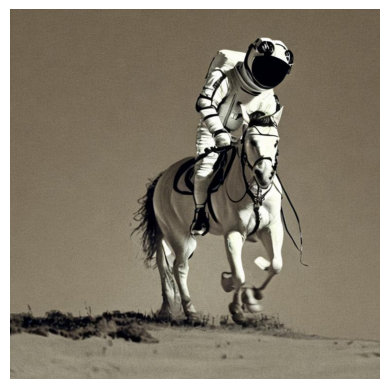

In [ ]:
image_path = "/content/f03c1cdf-3558-46c3-bd8d-86b8b21c781b.jpg"  # Upload the image and copy-paste the path
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")
plt.show()

### Alice storing the shared secret key

In [ ]:
filename = "shared_key.key"        # Storing the shared secret key (Real Key)
with open(filename, "wb") as key_file:
        key_file.write(Alice_key.encode('utf-8'))


### Encrypt the image

In [ ]:
encrypted_image = encrypt_image(image_path, Alice_key) # Calling the encryption function

### Storing the encrypted image

In [ ]:
folder_name = "encrypt_folder"
folder_path = f"/content/{folder_name}"
if not os.path.exists(folder_path):      # Creating the folder if it doesn't exist already
    os.makedirs(folder_path)

encrypted_path = f"/content/{folder_name}/encrypted_image.enc"

with open(encrypted_path, "wb") as encrypted_file:   # Storing thge encrypted image in the folder
        encrypted_file.write(encrypted_image)

## **BOB** the receiver

### Bob storing the shared secret key

In [ ]:
filename = "shared_key.key"        # Storing the shared secret key (Expected Key)
with open(filename, "wb") as key_file:
        key_file.write(Bob_key.encode('utf-8'))


### Decrypt the received image

In [ ]:
decrypted_image = decrypt_image(encrypted_path, Bob_key)   # Calling the decryption function

# If error rises due to incorrect key, quantum channel has been detected.
# In such cases, the channel is usually changed and the process is repeated.

InvalidToken: 

### Storing the decrypted image

In [ ]:
folder_name = "decrypt_folder"   # Creating the folder
folder_path = f"/content/{folder_name}"
if not os.path.exists(folder_path):      # Creating the folder if it doesn't exist already
    os.makedirs(folder_path)

decrypted_path = f"/content/{folder_name}/decrypted_image.jpg"

with open(decrypted_path, "wb") as decrypted_file:   # Storing the decrypted image in the folder
        decrypted_file.write(decrypted_image)

### Loading the decrypted image

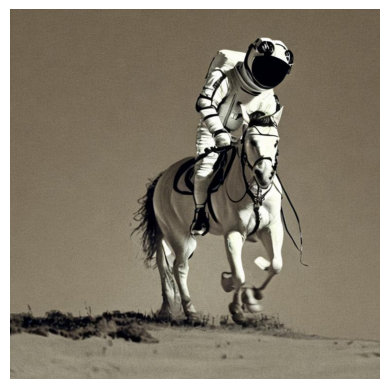

In [ ]:
received_image = Image.open(decrypted_path)

plt.imshow(received_image)
plt.axis("off")
plt.show()